In [108]:
import cv2
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2.imshow("Sample Image", img)
  cv2.waitKey(0)

# Read image with OpenCV.
image = cv2.imread('hand_sample_90_deg.jpg')
# Preview the image.
resize_and_show(image)

In [109]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, model_complexity=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.ob

Hand world landmarks of Sample Image:


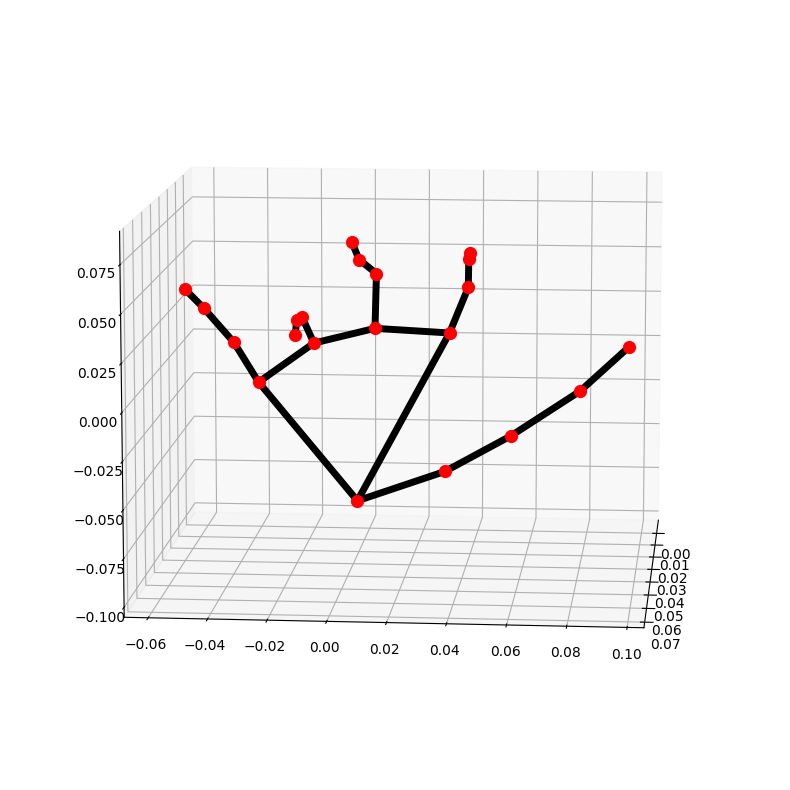

In [110]:
# Run MediaPipe Hands and plot 3d hands world landmarks.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    # Convert the BGR image to RGB and process it with MediaPipe Hands.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw hand world landmarks.
    print(f'Hand world landmarks of {"Sample Image"}:')
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [111]:
# Wrist landmark
wrist = mp_hands.HandLandmark.WRIST

# Index finger landmarks
index_tip = mp_hands.HandLandmark.INDEX_FINGER_TIP
index_pip = mp_hands.HandLandmark.INDEX_FINGER_PIP
index_mcp = mp_hands.HandLandmark.INDEX_FINGER_MCP

# Ring finger landmarks
ring_tip = mp_hands.HandLandmark.RING_FINGER_TIP
ring_pip = mp_hands.HandLandmark.RING_FINGER_PIP
ring_mcp = mp_hands.HandLandmark.RING_FINGER_MCP

# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:

    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
        # Get index finger coordinates.
        landmarks = {
            "index": {
                        "tip": [hand_landmarks.landmark[index_tip].x * image_width,
                                hand_landmarks.landmark[index_tip].y * image_hight,
                                hand_landmarks.landmark[index_tip].z * image_width],
                        "pip": [hand_landmarks.landmark[index_pip].x * image_width,
                                hand_landmarks.landmark[index_pip].y * image_hight,
                                hand_landmarks.landmark[index_pip].z * image_width],
                        "mcp": [hand_landmarks.landmark[index_mcp].x * image_width,
                                hand_landmarks.landmark[index_mcp].y * image_hight,
                                hand_landmarks.landmark[index_mcp].z * image_width]},
            "wrist":            [hand_landmarks.landmark[wrist].x * image_width,
                                hand_landmarks.landmark[wrist].y * image_hight,
                                hand_landmarks.landmark[wrist].z * image_width],
            "ring": {
                        "tip": [hand_landmarks.landmark[ring_tip].x * image_width,
                                hand_landmarks.landmark[ring_tip].y * image_hight,
                                hand_landmarks.landmark[ring_tip].z * image_width],
                        "pip": [hand_landmarks.landmark[ring_pip].x * image_width,
                                hand_landmarks.landmark[ring_pip].y * image_hight,
                                hand_landmarks.landmark[ring_pip].z * image_width],
                        "mcp": [hand_landmarks.landmark[ring_mcp].x * image_width,
                                hand_landmarks.landmark[ring_mcp].y * image_hight,
                                hand_landmarks.landmark[ring_mcp].z * image_width]}}
        mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))

In [112]:
# Generate vectors of pip -> mcp and pip -> tip to find pip angle
pip_mcp = np.subtract(landmarks["ring"]["pip"], landmarks["ring"]["mcp"])
pip_tip = np.subtract(landmarks["ring"]["pip"], landmarks["ring"]["tip"])

# Compute angle between them
dot_prod = np.dot(pip_mcp, pip_tip)
mag_prod = np.linalg.norm(pip_mcp)*np.linalg.norm(pip_tip)
theta = math.acos(dot_prod / mag_prod) * 180 / (2*math.pi)

# Print the angle
print("Ring Finger PIP Theta: ", theta)

Ring Finger PIP Theta:  83.99144765211066
